# PREDICTING USED CAR PRICES IN THE UK

INTRODUCTION

The used car market is a critical component of the automotive industry, offering consumers a wide range of vehicles at various prices. Understanding the factors that influence the pricing of used cars can benefit both buyers and sellers by providing greater transparency and insight into market behavior. In this project, we analyze a dataset of used cars from the United Kingdom to develop predictive models that estimate a car’s price based on its characteristics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-Processing & Preliminary Examination

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/used_cars_UK.csv')
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB


In [ ]:
# Dropping the 'Unnamed 0' column as its irrelevant to the dataset
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Dropping the 'Doors', 'Seats', and 'Emission Class' Column as it does not apply to our Analysis
df.drop(['Doors', 'Seats', 'Emission Class'], axis=1, inplace=True)

In [ ]:
# Dropping the 'Servide history' column due to too many null values
df.drop('Service history', axis=1, inplace=True)

In [ ]:
# Drop rows with null values
df.dropna(inplace=True)

In [ ]:
# Final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, 0 to 3684
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2266 non-null   object 
 1   Price              2266 non-null   int64  
 2   Mileage(miles)     2266 non-null   int64  
 3   Registration_Year  2266 non-null   int64  
 4   Previous Owners    2266 non-null   float64
 5   Fuel type          2266 non-null   object 
 6   Body type          2266 non-null   object 
 7   Engine             2266 non-null   object 
 8   Gearbox            2266 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 177.0+ KB


The cleaned dataset consists of 2,266 rows and 9 columns. Each row represents a used car listing from the United Kingdom. There are no missing values across any columns and all columns are either categorical or numerical.

# Exploratory Data Analysis

In [ ]:
df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual
5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual
9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual


In [ ]:
# Descriptive statistics for numerical columns
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners
count,2266.000000,2.266000e+03,2266.000000,2266.000000
mean,5980.744925,8.296124e+04,2012.180053,2.809797
std,4744.299787,4.230633e+04,5.011093,1.547343
min,400.000000,6.000000e+00,1972.000000,1.000000
25%,2475.000000,5.851150e+04,2009.000000,2.000000
50%,4265.000000,8.000000e+04,2012.000000,3.000000
75%,8490.000000,1.050000e+05,2016.000000,4.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000


In [ ]:
# Descriptive statistics for categorical columns
df.select_dtypes(include=['object']).describe()

,title,Fuel type,Body type,Engine,Gearbox
count,2266,2266,2266,2266,2266
unique,383,5,10,31,2
top,Vauxhall Corsa,Petrol,Hatchback,1.6L,Manual
freq,104,1392,1373,445,1787


In [ ]:
# Set a clean background
sns.set_style('whitegrid')

# Set a  gradient palette
custom_color = ['darkorange']
sns.set_palette(custom_color)

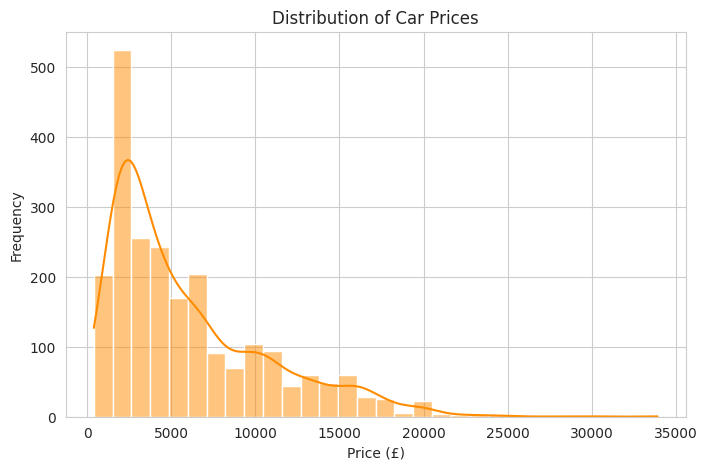

In [ ]:
# Histogram of Price to see how prices are distributed and detect any skewness or outliers
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True,)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

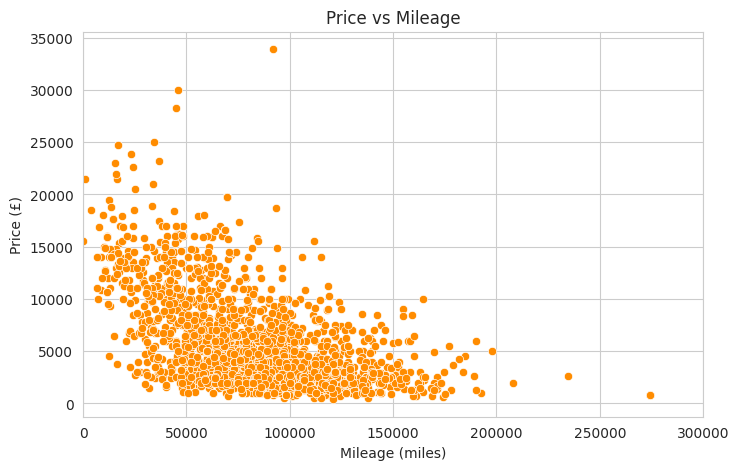

In [ ]:
# Scatterplot of Price vs Mileage to see if Mileage negatively impacts price

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage(miles)', y='Price', data=df,)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')

#Show x values uptil 300000 to avoid outliers (1 value at 1100000)
plt.xlim(0, 300000)

import matplotlib.ticker as ticker
# Set x-axis ticks in actual mileage numbers
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
plt.show()

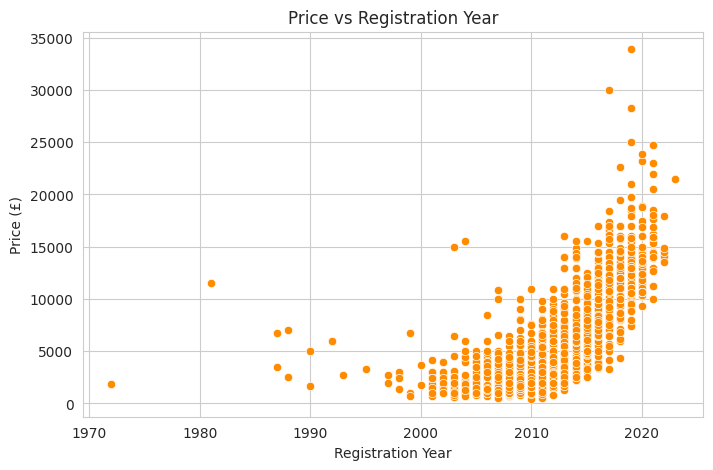

In [ ]:
# Scatterplot of Price vs Registration Year to see if Newer cars usually cost more
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Registration_Year', y='Price', data=df)
plt.title('Price vs Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Price (£)')
plt.show()

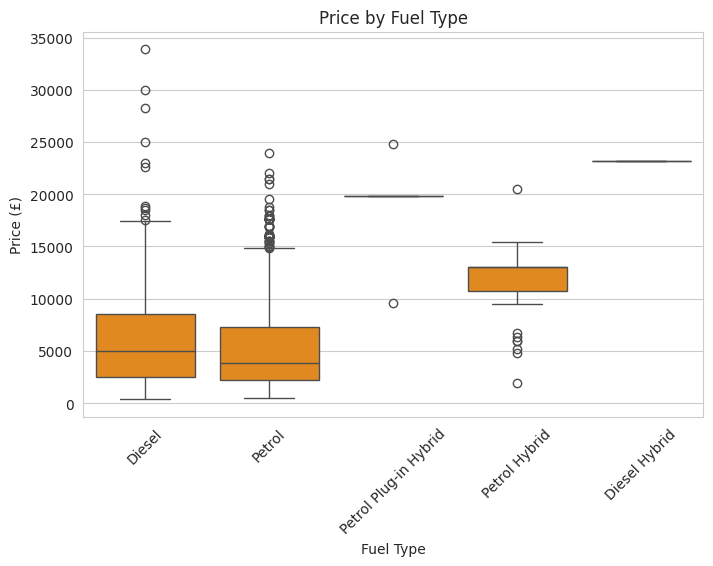

In [ ]:
# Boxplot of Price by Fuel Type to see how Different fuels (e.g., Diesel vs Petrol) affect value

plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel type', y='Price', data=df,)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()

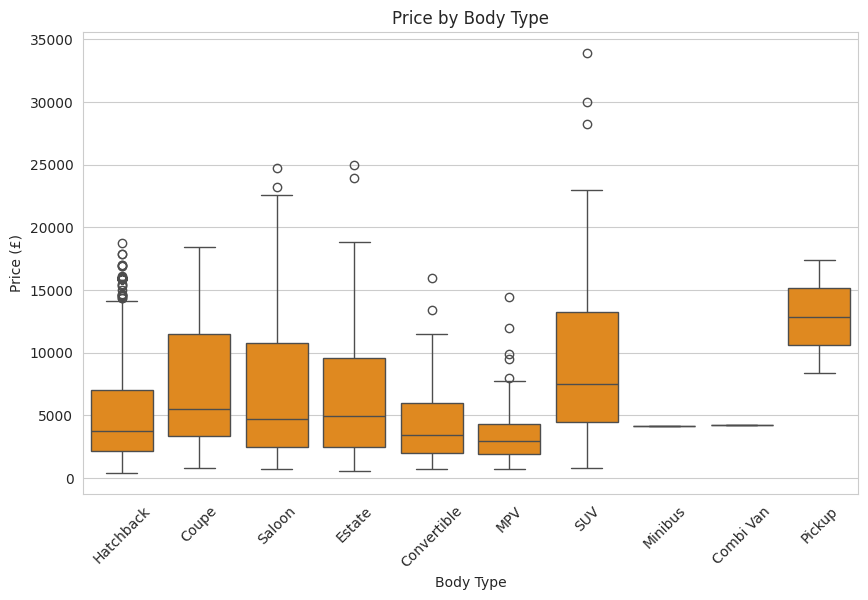

In [ ]:
# Boxplot of Price by Body Type to see what body types cost more

plt.figure(figsize=(10, 6))
sns.boxplot(x='Body type', y='Price', data=df)
plt.title('Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()

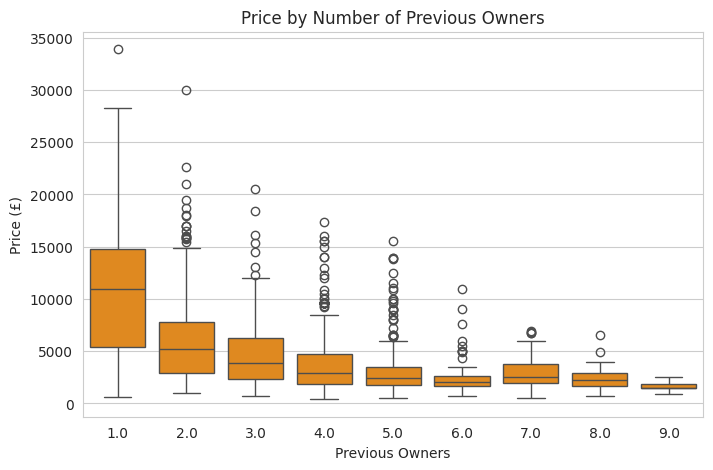

In [ ]:
# Boxplot of Previous Owners vs Price to see if more owners correspond to lower prices

plt.figure(figsize=(8, 5))
sns.boxplot(x='Previous Owners', y='Price', data=df)
plt.title('Price by Number of Previous Owners')
plt.xlabel('Previous Owners')
plt.ylabel('Price (£)')
plt.show()

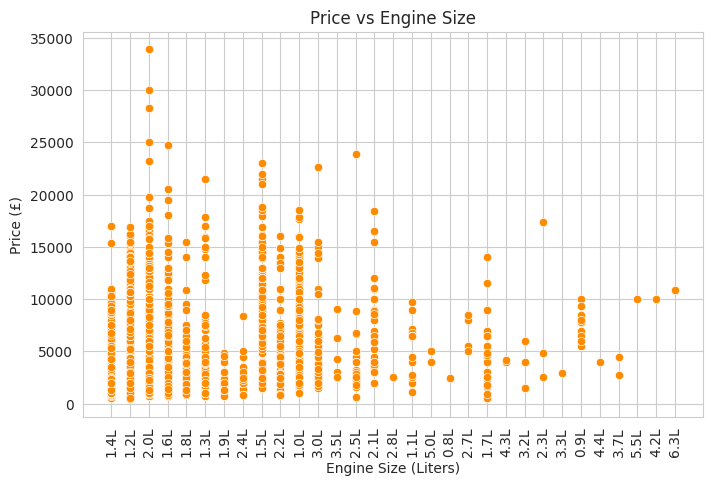

In [ ]:
# Scatterplot of Engine Size vs Price to see if larger engines are associated with higher prices

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Engine', y='Price', data=df)
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size (Liters)')
plt.xticks(rotation=90)
plt.ylabel('Price (£)')
plt.show()

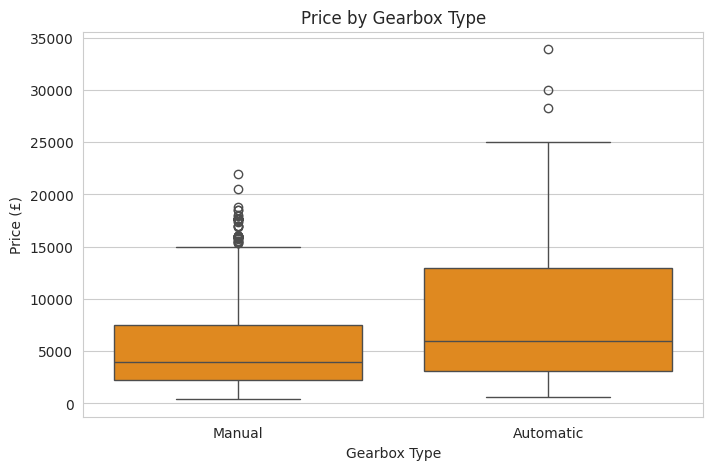

In [ ]:
# Boxplot of Gearbox Type vs Price to compare manual and automatic cars
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gearbox', y='Price', data=df)
plt.title('Price by Gearbox Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Price (£)')
plt.show()

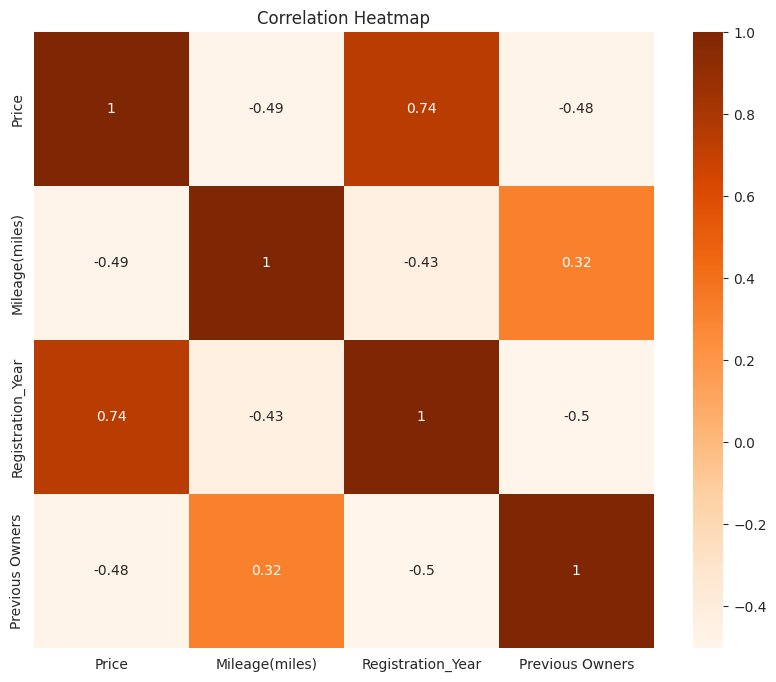

In [ ]:
# Correlation Heatmap to Find relationships between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='Oranges') # Select only numerical columns for correlation calculation
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#save the cleaned dataset to use in the modeling notebook
df.to_csv('cleaned_dataset.csv', index=False)